In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms

import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def find_data_dir():
    data_path = 'data'
    while os.path.exists(data_path) != True:
        data_path = '../' + data_path
        
    return data_path

In [2]:
# MNIST dataset

transform = transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor(),
])

mnist_train = datasets.MNIST(root=find_data_dir(),
                          train=True,
                          transform=transform,
                          download=True)
print("Downloading Train Data Done ! ")

mnist_test = datasets.MNIST(root=find_data_dir(),
                         train=False,
                         transform=transform,
                         download=True)
print("Downloading Test Data Done ! ")

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# our model
class Generator(nn.Module):
    def __init__(self, n_z=100, d=128):
        super(Generator, self).__init__() 
        self.deconv1 = nn.ConvTranspose2d(n_z, d*8, 4, 1, 0),
        self.bnorm1 = nn.BatchNorm2d(d*8),
        
        self.devonc2 = nn.ConvTranspose2d(d*8, d*4, 4, 2, 1),
        self.bnorm2 = nn.BatchNorm2d(d*4),
        
        self.deconv3 = nn.ConvTranspose2d(d*4, d*2, 4, 2, 1),
        self.bnorm3 = nn.BatchNorm2d(d*2),
        
        self.deconv4 = nn.ConvTranspose2d(d*2, 1, 4, 2, 1),
        
                    
    def forward(self, X):
        X = F.leaky_relu(self.bnorm1(self.deconv1(X)), negative_slope=0.003)
        X = F.leaky_relu(self.bnorm2(self.deconv2(X)), negative_slope=0.003)
        X = F.leaky_relu(self.bnorm3(self.deconv3(X)), negative_slope=0.003)
        X = torch.sigmoid(self.deconv4(X), negative_slope=0.003)
        return X
    
class Discriminator(nn.Module):
    def __init__(self, d=128):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, d, 4, 2, 1),
        self.bnorm1 = nn.BatchNorm2d(d),
        
        self.conv2 = nn.Conv2d(d, d*2, 4, 2, 1),
        self.bnorm2 = nn.BatchNorm2d(d*2),
        
        self.conv3 = nn.Conv2d(d*2, d*4, 4, 2, 1),
        self.bnorm3 = nn.BatchNorm2d(d*4),
        
        self.conv4 = nn.Conv2d(d*4, 1, 4, 1, 0),
        
    def forward(self, X):
        X = F.leaky_relu(self.bnorm1(self.conv1(X)), negative_slope=0.003)
        X = F.leaky_relu(self.bnorm2(self.conv2(X)), negative_slope=0.003)
        X = F.leaky_relu(self.bnorm3(self.conv3(X)), negative_slope=0.003)
        X = torch.sigmoid(self.conv1(X))
        return X

In [5]:
G = Generator().to(device)
D = Discriminator().to(device)

#criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

batch_size = 100

data_iter = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=1)

In [6]:
def plot_generator(num = 10):
    z = torch.randn(num, 100, 1, 1).to(device)
    
    test_g = G.forward(z)
    plt.figure(figsize=(8, 2))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(test_g[i].view(32, 32).data.cpu().numpy(), cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()
    

Iteration maker Done !
Epoch :  1 Iteration :  100 G_loss :  1.1669726 D_loss :  0.008726313
Epoch :  1 Iteration :  200 G_loss :  1.3269942 D_loss :  0.0056660264
Epoch :  1 Iteration :  300 G_loss :  1.6183938 D_loss :  0.017179903
Epoch :  1 Iteration :  400 G_loss :  1.1487894 D_loss :  0.01149914
Epoch :  1 Iteration :  500 G_loss :  0.87632984 D_loss :  0.009499591
Epoch :  1 Iteration :  600 G_loss :  1.0311581 D_loss :  0.011872888


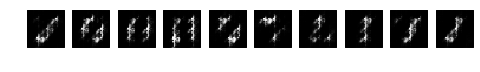

Epoch :  2 Iteration :  100 G_loss :  1.0101066 D_loss :  0.049943432
Epoch :  2 Iteration :  200 G_loss :  1.0419371 D_loss :  0.016606981
Epoch :  2 Iteration :  300 G_loss :  0.7115448 D_loss :  0.060820233
Epoch :  2 Iteration :  400 G_loss :  0.8278122 D_loss :  0.040042732
Epoch :  2 Iteration :  500 G_loss :  0.9279551 D_loss :  0.066446945
Epoch :  2 Iteration :  600 G_loss :  0.9486268 D_loss :  0.064169094


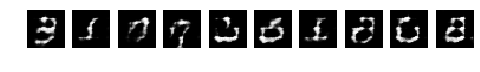

Epoch :  3 Iteration :  100 G_loss :  1.2320971 D_loss :  0.021028861
Epoch :  3 Iteration :  200 G_loss :  1.3292544 D_loss :  0.09745407
Epoch :  3 Iteration :  300 G_loss :  1.1896139 D_loss :  0.03469126
Epoch :  3 Iteration :  400 G_loss :  1.0928636 D_loss :  0.05078563
Epoch :  3 Iteration :  500 G_loss :  1.0789176 D_loss :  0.018138552
Epoch :  3 Iteration :  600 G_loss :  0.69688535 D_loss :  0.043866668


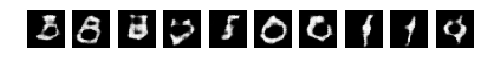

Epoch :  4 Iteration :  100 G_loss :  1.088263 D_loss :  0.05843568
Epoch :  4 Iteration :  200 G_loss :  1.0780203 D_loss :  0.037305795
Epoch :  4 Iteration :  300 G_loss :  0.5419905 D_loss :  0.21956506
Epoch :  4 Iteration :  400 G_loss :  0.9429342 D_loss :  0.05354017
Epoch :  4 Iteration :  500 G_loss :  1.9907463 D_loss :  0.0776484
Epoch :  4 Iteration :  600 G_loss :  1.5570992 D_loss :  0.050958153


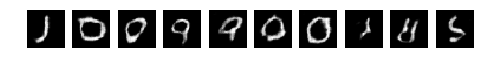

Epoch :  5 Iteration :  100 G_loss :  0.6645777 D_loss :  0.060029697
Epoch :  5 Iteration :  200 G_loss :  0.75879586 D_loss :  0.062064506
Epoch :  5 Iteration :  300 G_loss :  1.0637413 D_loss :  0.059181456
Epoch :  5 Iteration :  400 G_loss :  1.23233 D_loss :  0.048238255
Epoch :  5 Iteration :  500 G_loss :  0.7336102 D_loss :  0.11634976
Epoch :  5 Iteration :  600 G_loss :  0.7836675 D_loss :  0.061059035


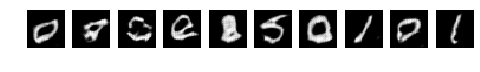

Epoch :  6 Iteration :  100 G_loss :  0.84246784 D_loss :  0.13710046
Epoch :  6 Iteration :  200 G_loss :  0.74576837 D_loss :  0.260368
Epoch :  6 Iteration :  300 G_loss :  0.6174886 D_loss :  0.13934663
Epoch :  6 Iteration :  400 G_loss :  1.064173 D_loss :  0.07232171
Epoch :  6 Iteration :  500 G_loss :  0.6788208 D_loss :  0.08790406
Epoch :  6 Iteration :  600 G_loss :  0.887255 D_loss :  0.04622762


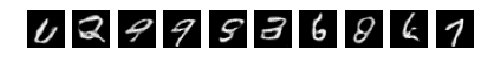

Epoch :  7 Iteration :  100 G_loss :  0.9310897 D_loss :  0.09614051
Epoch :  7 Iteration :  200 G_loss :  1.1346065 D_loss :  0.13201395
Epoch :  7 Iteration :  300 G_loss :  1.2671096 D_loss :  0.049759507
Epoch :  7 Iteration :  400 G_loss :  0.693358 D_loss :  0.094780825
Epoch :  7 Iteration :  500 G_loss :  1.0878563 D_loss :  0.109002605
Epoch :  7 Iteration :  600 G_loss :  1.0422366 D_loss :  0.06637621


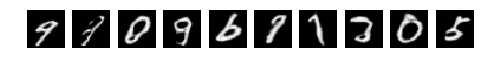

Epoch :  8 Iteration :  100 G_loss :  1.621259 D_loss :  0.13082653
Epoch :  8 Iteration :  200 G_loss :  0.5704924 D_loss :  0.065662116
Epoch :  8 Iteration :  300 G_loss :  0.7075896 D_loss :  0.04865225
Epoch :  8 Iteration :  400 G_loss :  0.93023723 D_loss :  0.05628571
Epoch :  8 Iteration :  500 G_loss :  1.1493137 D_loss :  0.07725224
Epoch :  8 Iteration :  600 G_loss :  0.87392735 D_loss :  0.24413504


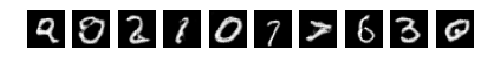

Epoch :  9 Iteration :  100 G_loss :  1.0221543 D_loss :  0.045834504
Epoch :  9 Iteration :  200 G_loss :  0.91454566 D_loss :  0.16782646
Epoch :  9 Iteration :  300 G_loss :  0.76002395 D_loss :  0.053620726
Epoch :  9 Iteration :  400 G_loss :  0.6078081 D_loss :  0.12566936
Epoch :  9 Iteration :  500 G_loss :  0.7871345 D_loss :  0.10478606
Epoch :  9 Iteration :  600 G_loss :  0.4791573 D_loss :  0.035748355


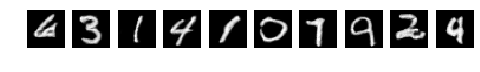

Epoch :  10 Iteration :  100 G_loss :  1.1493093 D_loss :  0.038645707
Epoch :  10 Iteration :  200 G_loss :  0.8345054 D_loss :  0.090095475
Epoch :  10 Iteration :  300 G_loss :  0.92937803 D_loss :  0.12294143
Epoch :  10 Iteration :  400 G_loss :  0.86517453 D_loss :  0.09499894
Epoch :  10 Iteration :  500 G_loss :  0.49592784 D_loss :  0.15349013
Epoch :  10 Iteration :  600 G_loss :  1.4777393 D_loss :  0.094632216


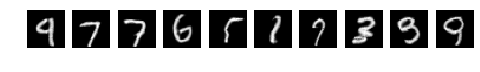

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type Generator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type Discriminator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [7]:
print("Iteration maker Done !")
history = {}
history['g_loss']=[]
history['d_loss']=[]
# Training loop
for epoch in range(10):
    avg_loss = 0
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_img, _) in enumerate(data_iter):
        
        # Preparing train data
        X = batch_img.to(device)
        
        real_lab = torch.ones(batch_size, 1).to(device)
        
        fake_lab = torch.zeros(batch_size, 1).to(device)
        
        
        # Training Discriminator
        D_pred = D.forward(X)
        d_loss_real = torch.mean((D_pred.view(-1, 1)-real_lab)**2) 
        #d_loss_real = criterion(D_pred.view(-1, 1), real_lab)
        real_score = D_pred
        
        z = torch.randn(batch_size, 100, 1, 1).to(device)
        
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        #d_loss_fake = criterion(G_pred.view(-1, 1), fake_lab)
        d_loss_fake = torch.mean(G_pred.view(-1, 1)**2) 
        fake_score = G_pred
        
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        
        # Training Generator
        z = torch.randn(batch_size, 100, 1, 1).to(device)
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        
        g_loss = torch.mean((G_pred.view(-1, 1)-real_lab)**2)
        
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        history['g_loss'].append(g_loss.data.cpu().numpy())
        history['d_loss'].append(d_loss.data.cpu().numpy())
        
        if (i+1)%100 == 0 :
            print("Epoch : ", epoch+1, "Iteration : ", i+1, "G_loss : ", g_loss.data.cpu().numpy(), "D_loss : ", d_loss.data.cpu().numpy())
    plot_generator()
    
torch.save(G.state_dict(), './trained/LSGAN/sd_gen')
torch.save(D.state_dict(), './trained/LSGAN/sd_dis')

torch.save(G, './trained/LSGAN/gen.pt')
torch.save(D, './trained/LSGAN/dis.pt')

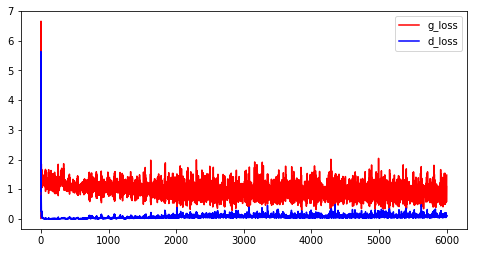

In [8]:
plt.figure(figsize=(8,4))
plt.plot(history['g_loss'], 'r-')
plt.plot(history['d_loss'], 'b-')
plt.legend(['g_loss', 'd_loss'], loc=1)
plt.show()